### Process Data

In [ ]:
import pandas as pd
# store variable names of interest
selected_vars = ['Location', 
                'Timestamp',
                'Average Occupancy',
                'Peak Occupancy',
                'Time Interval',
                'Location Path']

# import full 2019 BRFSS dataset
brfss = pd.read_csv('data/brfss2019.zip', compression = 'zip', usecols = selected_vars)

In [17]:
import pandas as pd
# from zipfile import ZipFile, Path

# pass in the specific file name 
# to the open method
# with ZipFile("fwddailynexusprarequestforlibraryflooroccupancydat.zip") as myzip:
    # data = myzip.open("OccupancyData--1Dec22-9Dec22.csv")

#Now, we can read in the data
df = pd.read_csv("OccupancyData--1Dec22-9Dec22.csv",header=5)
df.head()

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path
0,UCSB Library,12/01/2022 00:00,688,847,1hour,UCSB > UCSB Library
1,UCSB Library,12/01/2022 01:00,452,584,1hour,UCSB > UCSB Library
2,UCSB Library,12/01/2022 02:00,247,344,1hour,UCSB > UCSB Library
3,UCSB Library,12/01/2022 03:00,106,152,1hour,UCSB > UCSB Library
4,UCSB Library,12/01/2022 04:00,61,92,1hour,UCSB > UCSB Library


In [31]:
import numpy as np
import pandas as pd
import glob
import os

path = r'fwddailynexusprarequestforlibraryflooroccupancydat' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f,header=5) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one
concatenated_df.to_csv("Lib_hours.zip",compression="gzip")

In [26]:
df["Average Occupancy"].max()

3557

In [32]:
import pandas as pd 
selected_vars = ['Location','Timestamp','Average Occupancy','Peak Occupancy','Time Interval','Location Path']
floor = pd.read_csv("Lib_hours.zip", compression = 'gzip', usecols = selected_vars)
# floor.drop(columns='Unamed: 0')
floor

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path
0,UCSB Library,09/22/2021 16:00,12,2,1hour,UCSB > UCSB Library
1,UCSB Library,09/25/2021 12:00,30,39,1hour,UCSB > UCSB Library
2,UCSB Library,09/25/2021 13:00,21,27,1hour,UCSB > UCSB Library
3,UCSB Library,09/25/2021 14:00,91,199,1hour,UCSB > UCSB Library
4,UCSB Library,09/25/2021 15:00,73,84,1hour,UCSB > UCSB Library
...,...,...,...,...,...,...
177441,8th Floor GRS,01/31/2022 19:00,0,0,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...
177442,8th Floor GRS,01/31/2022 20:00,0,1,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...
177443,8th Floor GRS,01/31/2022 21:00,0,1,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...
177444,8th Floor GRS,01/31/2022 22:00,0,1,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...


adding quarter value to data frame

In [ ]:
{}

### Creating spatial dataframe

In [20]:
# import rasterio
# from rasterio.features import shapes
# import geopandas as gpd
# from matplotlib import pyplot
import matplotlib.pyplot as plt
from PIL import Image
from shapely.geometry import Polygon

In [26]:
from imageio import imread
from skimage import measure
from skimage.color.colorconv import rgb2gray, rgba2rgb
from shapely.geometry import shape, Point, Polygon, LineString
import geojson


/var/folders/5_/dpt6cl3j4fs4w5184wqyd8_r0000gn/T/ipykernel_1788/2921248331.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  polypic = imread("library_exploded_view-210912_0.png")


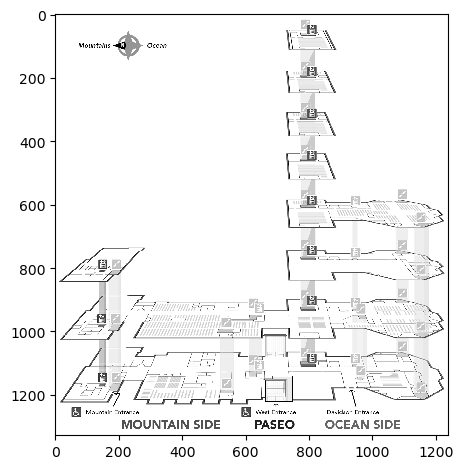

In [30]:
from skimage import io
# read a PNG
polypic = imread("library_exploded_view-210912_0.png")
# convert to greyscale if need be
gray = rgb2gray(rgba2rgb(polypic))

io.imshow(gray)
plt.show()


# find contours
# Not sure why 1.0 works as a level -- maybe experiment with lower values
# contours = measure.find_contours(gray, 1.0)

# build polygon, and simplify its vertices if need be
# this assumes a single, contiguous shape
# if you have e.g. multiple shapes, build a MultiPolygon with a list comp

# RESULTING POLYGONS ARE NOT GUARANTEED TO BE SIMPLE OR VALID
# check this yourself using e.g. poly.is_valid
# poly = Polygon(contours[0]).simplify(1.0)

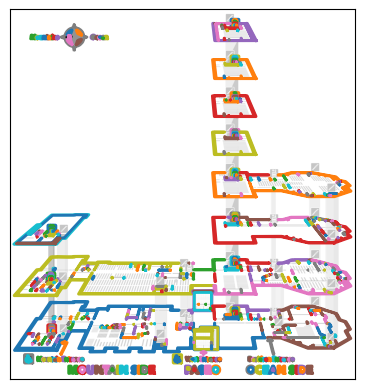

In [57]:
contours = measure.find_contours(gray, 0.6)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(gray, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [61]:
# import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
from geopandas import GeoSeries

polygons = [Polygon(contour[:, ::-1]) for contour in contours]

# g = GeoSeries(polygons)
cntr_df = gpd.GeoDataFrame(geometry=gpd.GeoSeries(polygons))
cntr_df.to_file('contours.geojson', driver='GeoJSON')  

In [62]:
cntr_df

,geometry
0,"POLYGON ((821.549 63.000, 822.000 62.334, 822...."
1,"POLYGON ((815.000 61.303, 814.000 61.620, 813...."
2,"POLYGON ((811.931 45.000, 811.000 44.447, 810...."
3,"POLYGON ((813.544 51.000, 813.712 50.000, 813...."
4,"POLYGON ((884.767 112.000, 884.499 111.000, 88..."
...,...
680,"POLYGON ((866.000 1303.182, 865.000 1303.295, ..."
681,"POLYGON ((1051.000 1302.088, 1050.000 1302.433..."
682,"POLYGON ((369.000 1297.193, 368.000 1297.079, ..."
683,"POLYGON ((664.000 1296.964, 663.000 1296.821, ..."


In [12]:
# src = rasterio.open('library_exploded_view-210912_0.png')
# pyplot.imshow(src.read(1))

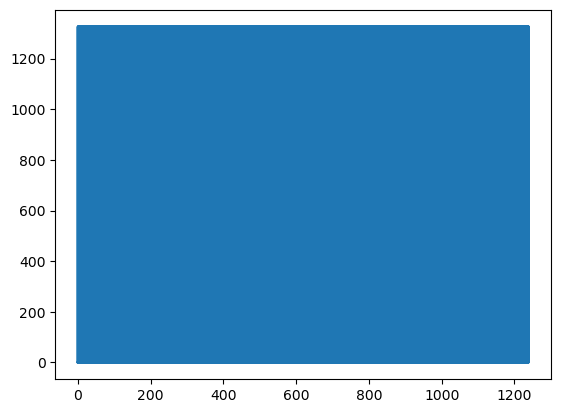

In [21]:
image = Image.open("library_exploded_view-210912_0.png")
image = image.convert('1')

vertices = list(image.getdata())
width, height = image.size

# convert 1D list of vertices to 2D list of (x, y) tuples
vertices = [(i % width, i // width) for i, v in enumerate(vertices) if v == 255]

# create Shapely Polygon object from the vertices
polygon = Polygon(vertices)
# pyplot.imshow(polygon)
plt.plot(*polygon.exterior.xy)

### Time Series Analysis 

https://plotly.com/python/sliders/

In [ ]:
import plotly.graph_objects as go
import numpy as np

floors = [] 

# Generate some example data
x = np.arange('2022-01-01', '2022-02-01', dtype='datetime64[h]')
# y1 = np.random.randn(len(x)).cumsum()
# y2 = np.random.randn(len(x)).cumsum()

# Create the figure
fig = go.Figure()

# Add the first trace
for floor in floors: 
    fig.add_trace(go.Scatter(x=x, y=floor, name="Iteration {}".format(floor)))

# Add the second trace
# fig.add_trace(go.Scatter(x=x, y=y2, name='Iteration 2'))

# Update the layout
fig.update_layout(
    title='Floor Iterations',
    xaxis_title='Date',
    yaxis_title='Value'
)

# Show the plot
fig.show()
